In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### 2. Rename the 21 columns with those given in the attribute list for the given dataset : "chk_acct", "duration", "credit_his", "purpose“, "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", "present_resid", "property", "age", "other_install", "housing", "n_credits", "job", "n_people", "telephone", "foreign", "response“.

In [19]:
columns_name = [ "chk_acct", "duration", "credit_his", "purpose", "amount", "saving_acct", "present_emp", "installment_rate", "sex", "other_debtor", "present_resid", "property", "age", "other_install", "housing", "n_credits", "job", "n_people", "telephone", "foreign", "response"]

### 1. Read the csv and drop/ignore the first column which is the serial number in the given file “German.csv”.

In [20]:
data = pd.read_csv('german.data', sep=' ', names=columns_name)

Check the shape of the dataset ? It should have 1000 rows and 21 columns

In [21]:
data.shape

(1000, 21)

In [22]:
data.describe()

,duration,amount,installment_rate,present_resid,age,n_credits,n_people,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [23]:
data.dtypes

chk_acct            object
duration             int64
credit_his          object
purpose             object
amount               int64
saving_acct         object
present_emp         object
installment_rate     int64
sex                 object
other_debtor        object
present_resid        int64
property            object
age                  int64
other_install       object
housing             object
n_credits            int64
job                 object
n_people             int64
telephone           object
foreign             object
response             int64
dtype: object

### 3. Take the “Response” variable. Currently the coding is done as 1 for good and 2 for bad. Subtract 1 from it to make it 0 for good and 1 for bad.

In [24]:
data['response'] = data['response'] - 1
data['response'] = data['response'].apply(str)

### 4. Convert the “Response” variable to a object from int variable. Summarize the levels of this class attribute

In [25]:
data['response'].describe()

count     1000
unique       2
top          0
freq       700
Name: response, dtype: object

### 5. Summarize the data set and it’s datatypes.

In [26]:
data.describe()

,duration,amount,installment_rate,present_resid,age,n_credits,n_people
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [27]:
data.dtypes

chk_acct            object
duration             int64
credit_his          object
purpose             object
amount               int64
saving_acct         object
present_emp         object
installment_rate     int64
sex                 object
other_debtor        object
present_resid        int64
property            object
age                  int64
other_install       object
housing             object
n_credits            int64
job                 object
n_people             int64
telephone           object
foreign             object
response            object
dtype: object

### 6. Give a correlation matrix for all the int columns in the given dataset

<AxesSubplot:>

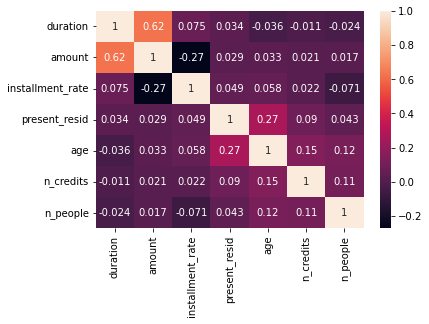

In [28]:
corr = data.corr()
sns.heatmap(corr, annot=True)

### 7. Draw a bar plot with : installment rate vs count of observations by response type 

<AxesSubplot:xlabel='response', ylabel='installment_rate'>

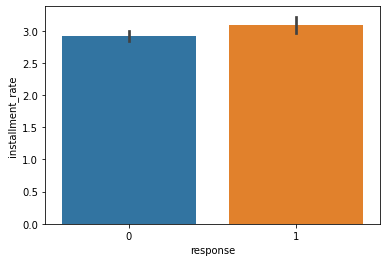

In [29]:
sns.barplot(data=data, x='response', y='installment_rate')

### 8. Draw a box plot for the age by response variable

<AxesSubplot:xlabel='response', ylabel='age'>

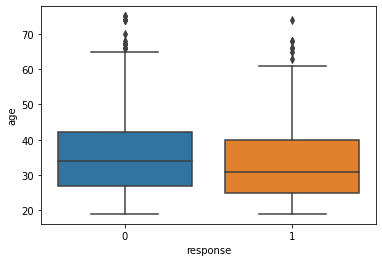

In [30]:
sns.boxplot(data=data, x='response', y='age')

### 9. Draw a box plot for the duration by response variable. 

<AxesSubplot:xlabel='response', ylabel='duration'>

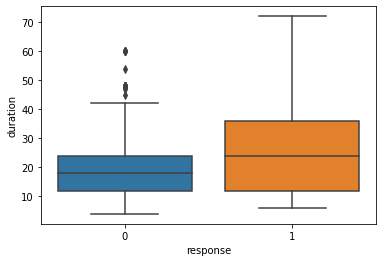

In [31]:
sns.boxplot(data=data, x='response', y='duration')

# 10. Comment on the observations for the plots of continuous variables in Q7, Q8 and Q9

### 11. Draw a bar plot with : chk_acct vs count of observations by response type and analyze 

In [32]:
new_saving_acct = pd.Categorical(data['saving_acct'], ordered=True)
new_saving_acct = new_saving_acct.rename_categories(['... < 100 DM', '100 <= ... < 500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM', 'unknown/\nno savings account'])
data['saving_acct'] = new_saving_acct

<AxesSubplot:xlabel='saving_acct', ylabel='count'>

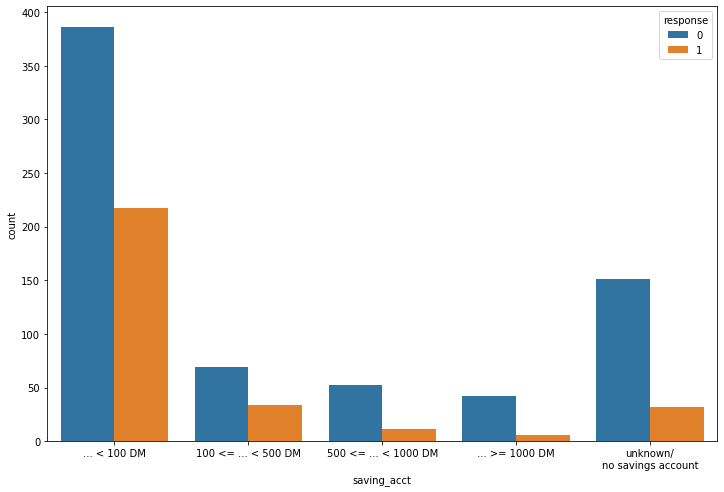

In [33]:
fig, ax = pyplot.subplots(figsize=(12, 8))
sns.countplot(data=data, x='saving_acct', hue='response', ax=ax)

### 12. Draw a bar plot with: credit_hist vs count of observations by response type and analyze it

In [58]:
new_credit_his = pd.Categorical(data['credit_his'], ordered=True)
new_credit_his = new_credit_his.rename_categories(['No credit taken/\nAll credit paid back duly', 'All credit at this\nbank paid back duly','Existing credits paid\nback duly untill now', 'Delay in paying off\nin the past', 'Critical amount/\nOther credit existing\n(Not at this bank)'])
data['credit_his'] = new_credit_his

<AxesSubplot:xlabel='credit_his', ylabel='count'>

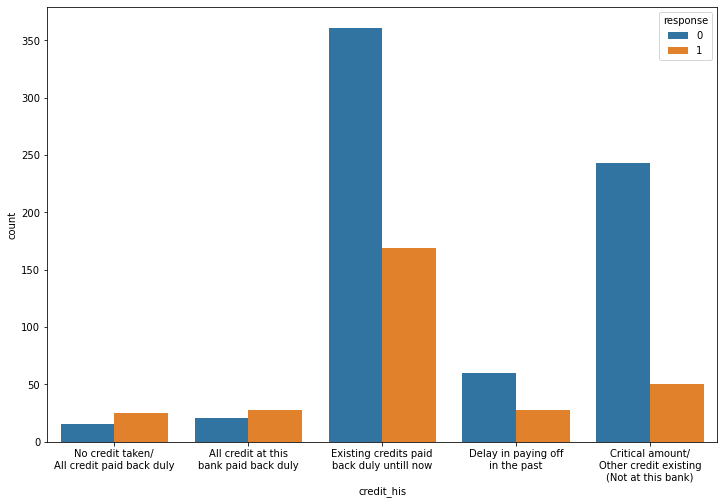

In [36]:
fig, ax = pyplot.subplots(figsize=(12, 8))
sns.countplot(data=data, x='credit_his', hue='response', ax=ax)

### 13. Draw a bar plot with: saving_acct vs count of observations by response type and analyze it

<AxesSubplot:xlabel='saving_acct', ylabel='count'>

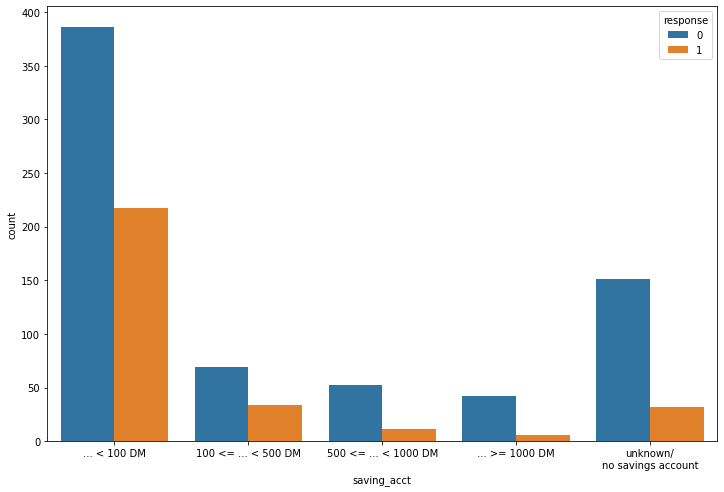

In [37]:
fig, ax = pyplot.subplots(figsize=(12, 8))
sns.countplot(data=data, x='saving_acct', hue='response', ax=ax)

### 14. Split the entire dataset to x and y from the given dataset . X will have columns : sex , housing, saving_acct, chk_acct, age, duration, amount and Y will have column: response 

In [38]:
X = data[["age", "duration", "amount"]]
y = data['response']

### 15. From the above created x and y: perform data standardization : One hot encoding of categorical columns(Sex, Housing, Saving accounts , Checking account) and normalization of numerical columns(Age, Duration, Amount)

In [39]:
data['sex'] = data['sex'].apply(str)
data['housing'] = data['housing'].apply(str)
data['saving_acct'] = data['saving_acct'].apply(str)
data['chk_acct'] = data['chk_acct'].apply(str)

In [40]:
data['age'] = data['age'].astype(int)
data['duration'] = data['duration'].astype(int)
data['amount'] = data['amount'].astype(int)

In [41]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.33, random_state=0)

In [42]:
log = LogisticRegression()

In [43]:
log.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred = log.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.7044776119402985

### 16. Dividing the Data into Train , Validation and Test Sets (80%-10%-10%)

In [46]:
X = data[["age", "duration", "amount"]].iloc[:,:2].values

In [47]:
y = data.iloc[:, 20].values.reshape(-1,1)

In [48]:
np.shape(X)

(1000, 2)

In [49]:
np.shape(y)

(1000, 1)

In [50]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.33, random_state=0)

In [51]:
log_grid = LogisticRegression()

In [52]:
grid = GridSearchCV(log_grid, {'penalty':['l2']}, cv=10)

In [53]:
grid.fit(X_train, y_train)

C:\Users\paolo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\paolo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\paolo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\paolo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l2']})

In [54]:
y_grid_pred = grid.predict(X_test)

In [55]:
grid.best_score_

0.7121212121212122

In [56]:
confusion_matrix(y_test, y_grid_pred)

array([[445,  21],
       [177,  27]], dtype=int64)